### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
from tqdm import tqdm

import torch
import nltk

from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [ ]:
file_path = 'B:/DCU/Practicum/Proj/Dataset/main/raw/upload_DJIA_table.csv'
stock_data = pd.read_csv(file_path)
stock_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [ ]:
file_path1 = 'B:/DCU/Practicum/Proj/Dataset/main/raw/RedditNews.csv'
reddit_data = pd.read_csv(file_path1)
reddit_data.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [ ]:
file_path2 = 'B:/DCU/Practicum/Proj/Dataset/main/raw/Combined_News_DJIA.csv'
news_data = pd.read_csv(file_path2)
news_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [6]:
stock_data.isnull().sum()
reddit_data.isnull().sum()
news_data.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [7]:
stock_data.info()
reddit_data.info()
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73608 entries, 0 to 73607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    73608 non-null  object
 1   News    73608 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 

In [8]:
# filled missing values by a blank space for text pre-processing
news_data.fillna('', inplace=True)
reddit_data.fillna('', inplace=True)

In [9]:
news_data.isnull().sum()
reddit_data.isnull().sum()

Date    0
News    0
dtype: int64

In [10]:
print(stock_data['Date'].dtype)
print(reddit_data['Date'].dtype)
print(news_data['Date'].dtype)

object
object
object


In [11]:
# changing to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
reddit_data['Date'] = pd.to_datetime(reddit_data['Date'])
news_data['Date'] = pd.to_datetime(news_data['Date'])

print(stock_data['Date'].dtype)
print(reddit_data['Date'].dtype)
print(news_data['Date'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


In [12]:
# sorted data to follow ascending order as the other dataframes do
news_data = news_data.sort_values(by='Date', ascending=True).reset_index(drop=True)
reddit_data = reddit_data.sort_values(by='Date', ascending=True).reset_index(drop=True)

In [13]:
news_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [14]:
reddit_data.head()

,Date,News
0,2008-06-08,"b'Marriage, they said, was reduced to the stat..."
1,2008-06-08,b'Nim Chimpsky: The tragedy of the chimp who t...
2,2008-06-08,"b""Canada: Beware slippery slope' to censorship..."
3,2008-06-08,b'EU Vice-President Luisa Morgantini and the I...
4,2008-06-08,"b""Israeli minister: Israel will attack Iran if..."


In [15]:
print(stock_data['Date'].min(), stock_data['Date'].max())
print(reddit_data['Date'].min(), reddit_data['Date'].max())
print(news_data['Date'].min(), news_data['Date'].max())

2008-08-08 00:00:00 2016-07-01 00:00:00
2008-06-08 00:00:00 2016-07-01 00:00:00
2008-08-08 00:00:00 2016-07-01 00:00:00


In [16]:
# removed every sentence starting with letter 'b'
for i in range(1, 26):
    news_data[f'Top{i}'] = news_data[f'Top{i}'].apply(lambda x: x.replace("b'", "").replace("'", "").replace('b"','').replace('"', '') if isinstance(x, str) else x)


reddit_data[f'News'] = reddit_data[f'News'].apply(lambda x: x.replace("b'", "").replace("'", "").replace('b"','').replace('"', '') if isinstance(x, str) else x)

In [17]:
news_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,Georgia downs two Russian warplanes as countri...,BREAKING: Musharraf to be impeached.,Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with impunity, U.N. offi...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The enemy combatent trials are nothing but a s...,...,Georgia Invades South Ossetia - if Russia gets...,Al-Qaeda Faces Islamist Backlash,Condoleezza Rice: The US would not act to prev...,This is a busy day: The European Union has ap...,"Georgia will withdraw 1,000 soldiers from Iraq...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Ossetia,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexicos Kidnapping Surge
1,2008-08-11,1,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict,Jewish Georgian minister: Thanks to Israeli tr...,Georgian army flees in disarray as Russians ad...,Olympic opening ceremony fireworks faked,What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S.Ossetia blames...,...,Israel and the US behind the Georgian aggression?,"Do not believe TV, neither Russian nor Georgia...",Riots are still going on in Montreal (Canada) ...,China to overtake US as largest manufacturer,War in South Ossetia [PICS],Israeli Physicians Group Condemns State Torture,Russia has just beaten the United States over...,Perhaps *the* question about the Georgia - Rus...,Russia is so much better at war,So this is what its come to: trading sex for f...
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,Russia ends Georgia operation,If we had no sexual harassment we would have n...,Al-Qaeda is losing support in Iraq because of ...,Ceasefire in Georgia: Putin Outmaneuvers the West,Why Microsoft and Intel tried to kill the XO $...,Stratfor: The Russo-Georgian War and the Balan...,Im Trying to Get a Sense of This Whole Georgia...,...,U.S. troops still in Georgia (did you know the...,Why Russias response to Georgia was right,Gorbachev accuses U.S. of making a serious blu...,"Russia, Georgia, and NATO: Cold War Two",Remember that adorable 62-year-old who led you...,War in Georgia: The Israeli connection,All signs point to the US encouraging Georgia ...,Christopher King argues that the US and NATO a...,America: The New Mexico?,BBC NEWS | Asia-Pacific | Extinction by man no...
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...,When the president ordered to attack Tskhinval...,Israel clears troops who killed Reuters camer...,Britain\s policy of being tough on drugs is po...,Body of 14 year old found in trunk; Latest (ra...,China has moved 10 *million* quake survivors i...,Bush announces Operation Get All Up In Russias...,Russian forces sink Georgian ships,...,Elephants extinct by 2020?,US humanitarian missions soon in Georgia - if ...,Georgias DDOS came from US sources,"Russian convoy heads into Georgia, violating t...",Israeli defence minister: US against strike on...,Gorbachev: We Had No Choice,Witness: Russian forces head towards Tbilisi i...,Quarter of Russians blame U.S. for conflict: ...,Georgian president says US military will take...,2006: Nobel laureate Aleksander Solzhenitsyn a...
4,2008-08-14,1,All the experts admit that we should legalise ...,War in South Osetia - 89 pictures made by a Ru...,Swedish wrestler Ara Abrahamian throws away me...,Russia exaggerated the death toll in South Oss...,Missile That Killed 9 Inside Pakistan May Have...,Rushdie Condemns Random Houses Refusal to Publ...,Poland and US agree to missle defense deal. In...,"Will the Russians conquer Tblisi? Bet on it, n...",...,Bank analyst forecast Georgian crisis 2

In [18]:
reddit_data.head()

,Date,News
0,2008-06-08,"Marriage, they said, was reduced to the status..."
1,2008-06-08,Nim Chimpsky: The tragedy of the chimp who tho...
2,2008-06-08,"Canada: Beware slippery slope to censorship, h..."
3,2008-06-08,EU Vice-President Luisa Morgantini and the Iri...
4,2008-06-08,Israeli minister: Israel will attack Iran if i...


In [19]:
# removed spaces
news_data = news_data.map(lambda x: x.strip() if isinstance(x, str) else x)
reddit_data = reddit_data.map(lambda x: x.strip() if isinstance(x, str) else x)

In [20]:
reddit_data['News'] = reddit_data['News'].str.strip()

for i in range(1, 26):
    news_data[f'Top{i}'] = news_data[f'Top{i}'].str.strip()

In [21]:
# lowercasing text data
for i in range(1, 26):
    news_data[f'Top{i}'] = news_data[f'Top{i}'].str.lower()

for i in range(1, 26):
    reddit_data[f'News'] = reddit_data[f'News'].str.lower()

In [22]:
# combining all the Top1 to Top25 news headlines of each day into one single string as FinBERT works best on one single large text/sentece
news_data['combined_news'] = news_data[[f'Top{i}' for i in range(1,26)]].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [23]:
reddit_grouped = reddit_data.groupby('Date')['News'].apply(lambda x: ' '.join(x)).reset_index()

reddit_grouped.rename(columns={'News': 'Combined_Reddit_News'}, inplace=True)

In [24]:
reddit_grouped.tail()

,Date,Combined_Reddit_News
2938,2016-06-27,angela merkel said the u.k. must file exit pap...
2939,2016-06-28,hong kong democracy activists call for return ...
2940,2016-06-29,a chatbot programmed by a british teenager has...
2941,2016-06-30,us airstrikes kill at least 250 isis fighters ...
2942,2016-07-01,china kills millions of innocent meditators fo...


In [25]:
news_data.tail()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combined_news
1984,2016-06-27,0,barclays and rbs shares suspended from trading...,pope says church should ask forgiveness from g...,poland shocked by xenophobic abuse of poles in uk,"there will be no second referendum, cabinet ag...","scotland welcome to join eu, merkel ally says",sterling dips below fridays 31-year low amid b...,no negative news about south african president...,surge in hate crimes in the u.k. following u.k...,...,boris johnson says the uk will continue to int...,richard branson is calling on the uk governmen...,turkey sorry for downing russian jet,edward snowden lawyer vows new push for pardon...,brexit opinion poll reveals majority dont want...,conservative mp leave campaigner: the leave ca...,"economists predict uk recession, further weake...","new eu superstate plan by france, germany: cre...",pakistani clerics declare transgender marriage...,barclays and rbs shares suspended from trading...
1985,2016-06-28,1,"2,500 scientists to australia: if you want to ...","the personal details of 112,000 french police ...",s&amp;p cuts united kingdom sovereign credit r...,huge helium deposit found in africa,ceo of the south african state broadcaster qui...,"brexit cost investors $2 trillion, the worst o...",hong kong democracy activists call for return ...,brexit: iceland president says uk can join tri...,...,there is increasing evidence that australia is...,"richard branson, the founder of virgin group, ...","37,000-yr-old skull from borneo reveals surpri...",palestinians stone western wall worshipers; po...,jean-claude juncker asks farage: why are you h...,romanians for remainians offering a new home t...,brexit: gibraltar in talks with scotland to st...,8 suicide bombers strike lebanon,mexicos security forces routinely use sexual t...,"2,500 scientists to australia: if you want to ..."
1986,2016-06-29,1,explosion at airport in istanbul,yemeni former president: terrorism is the offs...,uk must accept freedom of movement to access e...,devastated: scientists too late to captive bre...,british labor party leader jeremy corbyn loses...,a muslim shop in the uk was just firebombed wh...,mexican authorities sexually torture women in ...,uk shares and pound continue to recover,...,the land under beijing is sinking by as much a...,car bomb and anti-islamic attack on mosque in ...,emaciated lions in taiz zoo are trapped in blo...,rupert murdoch describes brexit as wonderful. ...,more than 40 killed in yemen suicide attacks,google found disastrous symantec and norton vu...,extremist violence on the rise in germany: dom...,bbc news: labour mps pass corbyn no-confidence...,tiny new zealand town with too many jobs launc...,explosion at airport in istanbul yemeni former...
1987,2016-06-30,1,jamaica proposes marijuana dispensers for tour...,stephen hawking says pollution and stupidity s...,boris johnson says he will not run for tory pa...,six gay men in ivory coast were abused and for...,switzerland denies citizenship to muslim immig...,palestinian terrorist stabs israeli teen girl ...,puerto rico will default on $1 billion of debt...,republic of ireland fans to be awarded medal f...,...,mounting evidence suggests hobbits were wiped ...,the men who carried out tuesdays terror attack...,calls to suspend saudi arabia from un human ri...,more than 100 nobel laureates call out greenpe...,british pedophile sentenced to 85 years in us ...,"us permitted 1,200 offshore fracks in gulf of ...",we will be swimming in ridicule - french beach...,uefa says no minutes of silence for istanbul v...,law enforcement sources: gun used in paris ter...,jamaica proposes marijuana dispensers for tour...
1988,2016-07-01,1,a 117-year-old woman in mexico city finally re...,imf chief backs athens as permanent olympic host,"the president of france says if brexit won, so...",british man who must give police 24 hours noti...,100+ nobel laureates urge g

In [29]:
print(news_data.loc[0, 'combined_news'])

georgia downs two russian warplanes as countries move to brink of war breaking: musharraf to be impeached. russia today: columns of troops roll into south ossetia; footage from fighting (youtube) russian tanks are moving towards the capital of south ossetia, which has reportedly been completely destroyed by georgian artillery fire afghan children raped with impunity, u.n. official says - this is sick, a three year old was raped and they do nothing 150 russian tanks have entered south ossetia whilst georgia shoots down two russian jets. breaking: georgia invades south ossetia, russia warned it would intervene on sos side the enemy combatent trials are nothing but a sham: salim haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it. georgian troops retreat from s. osettain capital, presumably leaving several hundred people killed. [video] did the u.s. prep georgia for war with russia? rice gives green light for israel to attack iran: says u

In [30]:
print(reddit_data.loc[3, 'News'])

eu vice-president luisa morgantini and the irish nobel laureate, mairead corrigan, have been tear gased and injured by the idf while attending the international conference on non-violent resistance


In [31]:
news_data.duplicated().sum()
reddit_data.duplicated().sum()
stock_data.duplicated().sum()
news_data['Date'].duplicated().sum()

np.int64(0)

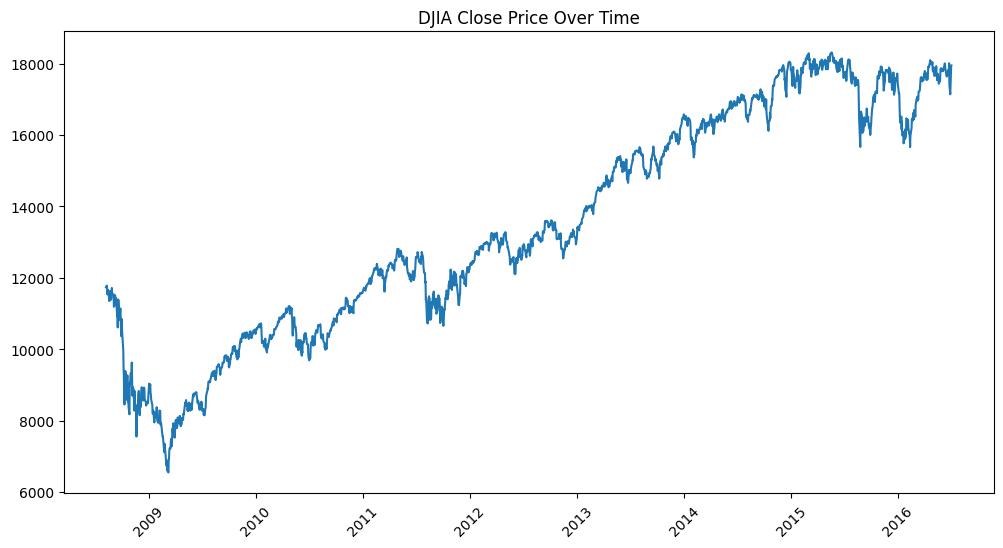

In [32]:
# Closing Price over time
plt.figure(figsize=(12,6))
plt.plot(stock_data['Date'], stock_data['Close'])
plt.title('DJIA Close Price Over Time')
plt.xticks(rotation=45)
plt.show()

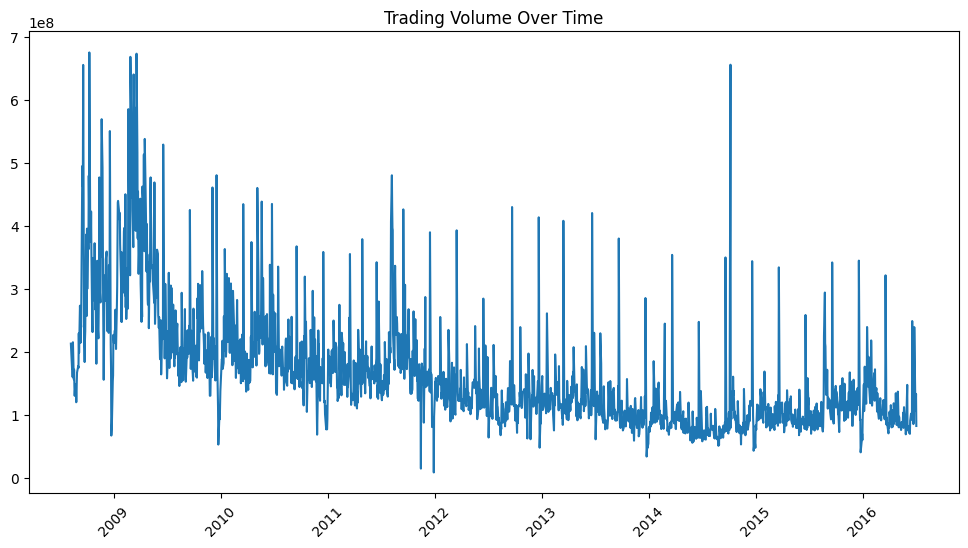

In [33]:
plt.figure(figsize=(12,6))
plt.plot(stock_data['Date'], stock_data['Volume'])
plt.title('Trading Volume Over Time')
plt.xticks(rotation=45)
plt.show()

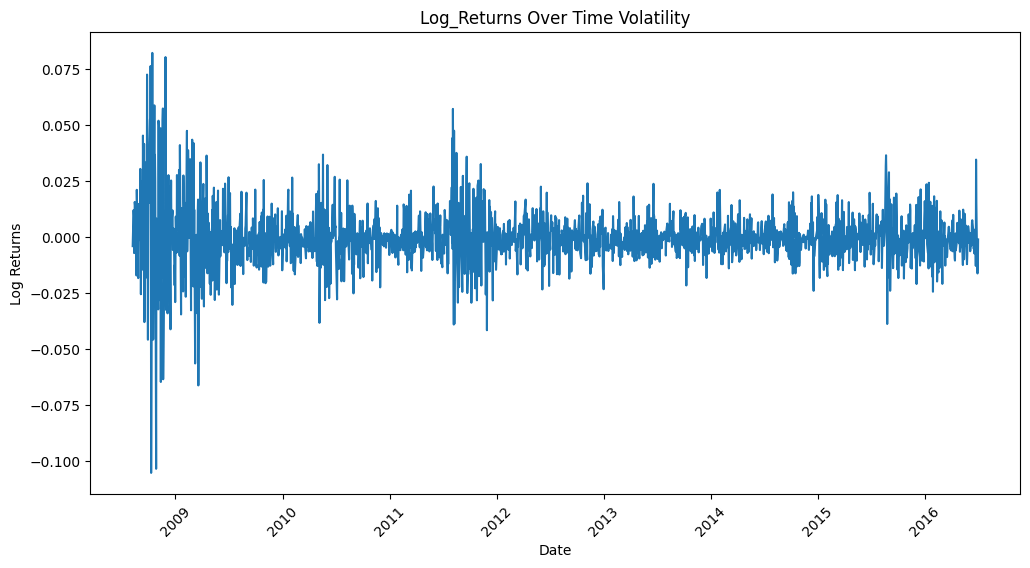

In [34]:
# stock_data['Volatility'] = stock_data['Close'].rolling(window=10).std()
stock_data['Log_Returns'] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
stock_data['Volatility_Log_10'] = stock_data['Log_Returns'].rolling(window=10).std() * np.sqrt(252)
stock_data['cl-op'] = stock_data['Close'] - stock_data['Open']
stock_data['hi-lo'] = stock_data['High'] - stock_data['Low']

plt.figure(figsize=(12,6))
plt.plot(stock_data['Date'], stock_data['Log_Returns'], label='Log Returns')
plt.title('Log_Returns Over Time Volatility')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.xticks(rotation=45)
plt.show()

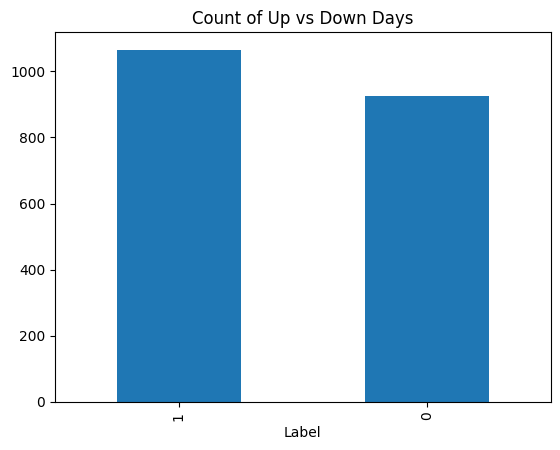

In [35]:
news_data['Label'].value_counts().plot(kind='bar')
plt.title('Count of Up vs Down Days')
plt.show()

In [36]:
stock_features = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]

correlation_matrix = stock_features.corr() # type: ignore

print(correlation_matrix)

            Open      High       Low     Close    Volume
Open    1.000000  0.999592  0.999436  0.998991 -0.691621
High    0.999592  1.000000  0.999373  0.999546 -0.686997
Low     0.999436  0.999373  1.000000  0.999595 -0.699572
Close   0.998991  0.999546  0.999595  1.000000 -0.694281
Volume -0.691621 -0.686997 -0.699572 -0.694281  1.000000


In [37]:
stock_features = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]

covariance_matrix = stock_features.cov() # type: ignore

print(covariance_matrix)

                Open          High           Low         Close        Volume
Open    9.880219e+06  9.854163e+06  9.897074e+06  9.872527e+06 -2.041858e+11
High    9.854163e+06  9.836200e+06  9.874379e+06  9.855979e+06 -2.023682e+11
Low     9.897074e+06  9.874379e+06  9.925152e+06  9.900935e+06 -2.070022e+11
Close   9.872527e+06  9.855979e+06  9.900935e+06  9.884780e+06 -2.050184e+11
Volume -2.041858e+11 -2.023682e+11 -2.070022e+11 -2.050184e+11  8.821610e+15


### Sentiment Analysis

In [39]:
nltk.download('vader_lexicon', quiet=True)

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [40]:
def get_vader_sentiment(text):
    if pd.isna(text) or text == '' or text == 'nan':
        return 0.0

    try:
        scores = sia.polarity_scores(str(text))
        return scores['compound']
    except:
        return 0.0

In [41]:
# VADER to news data
print("Computing VADER sentiment for news data...")
print(f"Processing {len(news_data)} rows...")

tqdm.pandas(desc="News VADER Sentiment")

news_data['vader_news_sentiment'] = news_data['combined_news'].progress_apply(get_vader_sentiment)

print(f"Sentiment range: {news_data['vader_news_sentiment'].min():.4f} to {news_data['vader_news_sentiment'].max():.4f}")
print(f"Mean sentiment: {news_data['vader_news_sentiment'].mean():.4f}")

Computing VADER sentiment for news data...
Processing 1989 rows...


News VADER Sentiment: 100%|██████████| 1989/1989 [00:06<00:00, 300.53it/s]

Sentiment range: -0.9996 to 0.9910
Mean sentiment: -0.9602


In [42]:
reddit_grouped.columns

Index(['Date', 'Combined_Reddit_News'], dtype='object')

In [43]:
# VADER to reddit_data
print("Computing VADER sentiment for reddit data...")
print(f"Processing {len(reddit_grouped)} rows...")

tqdm.pandas(desc="Reddit VADER Sentiment")

reddit_grouped['vader_reddit_sentiment'] = reddit_grouped['Combined_Reddit_News'].progress_apply(get_vader_sentiment)

print(f"Sentiment range: {reddit_grouped['vader_reddit_sentiment'].min():.4f} to {reddit_grouped['vader_reddit_sentiment'].max():.4f}")
print(f"Mean sentiment: {reddit_grouped['vader_reddit_sentiment'].mean():.4f}")

Computing VADER sentiment for reddit data...
Processing 2943 rows...


Reddit VADER Sentiment: 100%|██████████| 2943/2943 [00:09<00:00, 304.85it/s]


Sentiment range: -0.9996 to 0.9736
Mean sentiment: -0.9583


In [44]:
# Verify the results
print("\nNews Data - First 5 sentiment scores:")
print(news_data[['Date', 'vader_news_sentiment']].head())

print("\nReddit Data - First 5 sentiment scores:")
print(reddit_grouped[['Date', 'vader_reddit_sentiment']].head())

print(f"\nMissing values in vader_news_sentiment: {news_data['vader_news_sentiment'].isnull().sum()}")
print(f"Missing values in vader_reddit_sentiment: {reddit_grouped['vader_reddit_sentiment'].isnull().sum()}")


News Data - First 5 sentiment scores:
        Date  vader_news_sentiment
0 2008-08-08               -0.9978
1 2008-08-11               -0.9814
2 2008-08-12               -0.9778
3 2008-08-13               -0.9809
4 2008-08-14               -0.9899

Reddit Data - First 5 sentiment scores:
        Date  vader_reddit_sentiment
0 2008-06-08                 -0.9975
1 2008-06-09                 -0.9968
2 2008-06-10                 -0.9962
3 2008-06-11                 -0.9901
4 2008-06-12                 -0.8840

Missing values in vader_news_sentiment: 0
Missing values in vader_reddit_sentiment: 0


In [45]:
# Check the date distribution in reddit_data
print("Reddit data date distribution:")
print(f"Unique dates in reddit_data: {reddit_grouped['Date'].nunique()}")
print(f"Total rows in reddit_data: {len(reddit_grouped)}")
print(f"Average posts per date: {len(reddit_grouped) / reddit_grouped['Date'].nunique():.1f}")

Reddit data date distribution:
Unique dates in reddit_data: 2943
Total rows in reddit_data: 2943
Average posts per date: 1.0


In [46]:
# Check the date distribution in news_data
print("Reddit data date distribution:")
print(f"Unique dates in vader_news_data: {news_data['Date'].nunique()}")
print(f"Total rows in vader_news_data: {len(news_data)}")
print(f"Average posts per date: {len(news_data) / news_data['Date'].nunique():.1f}")

Reddit data date distribution:
Unique dates in vader_news_data: 1989
Total rows in vader_news_data: 1989
Average posts per date: 1.0


## FinBERT

In [47]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [49]:
def get_finbert_sentiment_with_label(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = softmax(outputs.logits, dim=1)

        negative = probs[0][0].item()
        neutral = probs[0][1].item()
        positive = probs[0][2].item()

        # Improved Neutral Handling
        if 0.2 < neutral < 0.6:
          sentiment_score = 0.0
          label = 'Neutral'
        else:
          sentiment_score = positive - negative
          # Avoid extreme +1.0 or -0.5 scores
          sentiment_score = max(min(sentiment_score, 0.9), -0.4)
          # Basic label assignment
          label = 'Positive' if sentiment_score > 0 else 'Negative'


    return sentiment_score, label

In [50]:
news_data.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'combined_news', 'vader_news_sentiment'],
      dtype='object')

In [51]:
tqdm.pandas()

news_data[['FinBERT_news_sentiment', 'FinBERT_news_label']] = news_data['combined_news'].progress_apply(
    lambda x: pd.Series(get_finbert_sentiment_with_label(x))
)
print(news_data[['Date', 'combined_news', 'FinBERT_news_sentiment', 'FinBERT_news_label']].head())

100%|██████████| 1989/1989 [13:57<00:00,  2.37it/s]

        Date                                      combined_news  \
0 2008-08-08  georgia downs two russian warplanes as countri...   
1 2008-08-11  why wont america and nato help us? if they won...   
2 2008-08-12  remember that adorable 9-year-old who sang at ...   
3 2008-08-13  u.s. refuses israel weapons to attack iran: re...   
4 2008-08-14  all the experts admit that we should legalise ...   

   FinBERT_news_sentiment FinBERT_news_label  
0                0.190408           Positive  
1                0.255340           Positive  
2                0.000000            Neutral  
3                0.000000            Neutral  
4                0.142573           Positive  


In [52]:
tqdm.pandas()

reddit_grouped[['FinBERT_reddit_sentiment', 'FinBERT_reddit_label']] = reddit_grouped['Combined_Reddit_News'].progress_apply(
    lambda x: pd.Series(get_finbert_sentiment_with_label(x))
)
print(reddit_grouped[['Date', 'Combined_Reddit_News', 'FinBERT_reddit_sentiment', 'FinBERT_reddit_label']].head())

100%|██████████| 2943/2943 [22:07<00:00,  2.22it/s]

        Date                               Combined_Reddit_News  \
0 2008-06-08  marriage, they said, was reduced to the status...   
1 2008-06-09  chew qat: in yemen, 72 per cent of men and 32 ...   
2 2008-06-10  31 year old beats 3 year old to death: worst c...   
3 2008-06-11  pakistan blames u.s. coalition for troops deat...   
4 2008-06-12  marine mean motari gets expelled, another puni...   

   FinBERT_reddit_sentiment FinBERT_reddit_label  
0                  0.305556             Positive  
1                  0.268858             Positive  
2                  0.312289             Positive  
3                  0.000000              Neutral  
4                  0.000000              Neutral  


In [53]:
# Verify the results
print("\nNews Data - First 5 sentiment scores:")
print(news_data[['Date', 'FinBERT_news_sentiment']].head())

print("\nReddit Data - First 5 sentiment scores:")
print(reddit_grouped[['Date', 'FinBERT_reddit_sentiment']].head())

print(f"\nMissing values in FinBERT_news_sentiment: {news_data['FinBERT_news_sentiment'].isnull().sum()}")
print(f"Missing values in FinBERT_reddit_sentiment: {reddit_grouped['FinBERT_reddit_sentiment'].isnull().sum()}")

print(f"Sentiment range: {news_data['FinBERT_news_sentiment'].min():.4f} to {news_data['FinBERT_news_sentiment'].max():.4f}")
print(f"Mean sentiment: {news_data['FinBERT_news_sentiment'].mean():.4f}")

print(f"Sentiment range: {reddit_grouped['FinBERT_reddit_sentiment'].min():.4f} to {reddit_grouped['FinBERT_reddit_sentiment'].max():.4f}")
print(f"Mean sentiment: {reddit_grouped['FinBERT_reddit_sentiment'].mean():.4f}")


News Data - First 5 sentiment scores:
        Date  FinBERT_news_sentiment
0 2008-08-08                0.190408
1 2008-08-11                0.255340
2 2008-08-12                0.000000
3 2008-08-13                0.000000
4 2008-08-14                0.142573

Reddit Data - First 5 sentiment scores:
        Date  FinBERT_reddit_sentiment
0 2008-06-08                  0.305556
1 2008-06-09                  0.268858
2 2008-06-10                  0.312289
3 2008-06-11                  0.000000
4 2008-06-12                  0.000000

Missing values in FinBERT_news_sentiment: 0
Missing values in FinBERT_reddit_sentiment: 0
Sentiment range: -0.0197 to 0.8869
Mean sentiment: 0.1401
Sentiment range: -0.4000 to 0.8561
Mean sentiment: 0.1364


## Smart Sentiment

In [54]:
def smart_sentiment(text):
    score, label = get_finbert_sentiment_with_label(text)

    # Keyword lists
    extreme_negative_words = ['crash', 'collapse', 'plummet', 'wipeout', 'bankruptcy', 'liquidation', 'massive loss', 'wipe out']
    negative_words = ['fall', 'down', 'drop', 'loss', 'bearish', 'sell', 'breakdown', 'decline']
    positive_words = ['rise', 'gain', 'soar', 'up', 'surge', 'bullish', 'profit', 'growth', 'buy', 'record high']
    neutral_words = ['neutral', 'flat', 'no change', 'unchanged', 'stable', 'steady']

    text_lower = text.lower()

    # Apply Extreme Negative Penalty (Higher)
    if any(word in text_lower for word in extreme_negative_words):
        score -= 0.7
        label = 'Negative'

    # Apply Regular Negative Penalty
    elif any(word in text_lower for word in negative_words):
        score -= 0.4
        label = 'Negative'

    # Apply Positive Boost
    elif any(word in text_lower for word in positive_words):
        score += 0.4
        label = 'Positive'

    # Set Explicit Neutral Handling
    elif any(word in text_lower for word in neutral_words):
        score = 0.0
        label = 'Neutral'

    # Clip score between -1 and 1
    score = max(min(score, 0.9), -0.7)

    # Final Label Assignment (Refined Thresholds)
    if score > 0.3:
        label = 'Positive'
    elif score < -0.3:
        label = 'Negative'
    else:
        label = 'Neutral'

    return score, label

In [55]:
tqdm.pandas()

news_data[['Smart_news_sentiment', 'Smart_news_label']] = news_data['combined_news'].progress_apply(
    lambda x: pd.Series(smart_sentiment(x))
)
print(news_data[['Date', 'combined_news', 'Smart_news_sentiment', 'Smart_news_label']].head())

100%|██████████| 1989/1989 [14:31<00:00,  2.28it/s]

        Date                                      combined_news  \
0 2008-08-08  georgia downs two russian warplanes as countri...   
1 2008-08-11  why wont america and nato help us? if they won...   
2 2008-08-12  remember that adorable 9-year-old who sang at ...   
3 2008-08-13  u.s. refuses israel weapons to attack iran: re...   
4 2008-08-14  all the experts admit that we should legalise ...   

   Smart_news_sentiment Smart_news_label  
0             -0.209592          Neutral  
1             -0.144660          Neutral  
2             -0.400000         Negative  
3              0.400000         Positive  
4              0.542573         Positive  


In [56]:
tqdm.pandas()

reddit_grouped[['Smart_reddit_sentiment', 'Smart_reddit_label']] = reddit_grouped['Combined_Reddit_News'].progress_apply(
    lambda x: pd.Series(smart_sentiment(x))
)
print(reddit_grouped[['Date', 'Combined_Reddit_News', 'Smart_reddit_sentiment', 'Smart_reddit_label']].head())

100%|██████████| 2943/2943 [20:49<00:00,  2.35it/s]

        Date                               Combined_Reddit_News  \
0 2008-06-08  marriage, they said, was reduced to the status...   
1 2008-06-09  chew qat: in yemen, 72 per cent of men and 32 ...   
2 2008-06-10  31 year old beats 3 year old to death: worst c...   
3 2008-06-11  pakistan blames u.s. coalition for troops deat...   
4 2008-06-12  marine mean motari gets expelled, another puni...   

   Smart_reddit_sentiment Smart_reddit_label  
0                0.705556           Positive  
1               -0.131142            Neutral  
2               -0.087711            Neutral  
3               -0.400000           Negative  
4               -0.400000           Negative  


In [57]:
# Verify the results
print("\nNews Data - First 5 sentiment scores:")
print(news_data[['Date', 'Smart_news_sentiment']].head())

print("\nReddit Data - First 5 sentiment scores:")
print(reddit_grouped[['Date', 'Smart_reddit_sentiment']].head())

print(f"\nMissing values in Smart_news_sentiment: {news_data['Smart_news_sentiment'].isnull().sum()}")
print(f"Missing values in Smart_reddit_sentiment: {reddit_grouped['Smart_reddit_sentiment'].isnull().sum()}")

print(f"Sentiment range: {news_data['Smart_news_sentiment'].min():.4f} to {news_data['Smart_news_sentiment'].max():.4f}")
print(f"Mean sentiment: {news_data['Smart_news_sentiment'].mean():.4f}")

print(f"Sentiment range: {reddit_grouped['Smart_reddit_sentiment'].min():.4f} to {reddit_grouped['Smart_reddit_sentiment'].max():.4f}")
print(f"Mean sentiment: {reddit_grouped['Smart_reddit_sentiment'].mean():.4f}")


News Data - First 5 sentiment scores:
        Date  Smart_news_sentiment
0 2008-08-08             -0.209592
1 2008-08-11             -0.144660
2 2008-08-12             -0.400000
3 2008-08-13              0.400000
4 2008-08-14              0.542573

Reddit Data - First 5 sentiment scores:
        Date  Smart_reddit_sentiment
0 2008-06-08                0.705556
1 2008-06-09               -0.131142
2 2008-06-10               -0.087711
3 2008-06-11               -0.400000
4 2008-06-12               -0.400000

Missing values in Smart_news_sentiment: 0
Missing values in Smart_reddit_sentiment: 0
Sentiment range: -0.7000 to 0.9000
Mean sentiment: -0.1374
Sentiment range: -0.7000 to 0.9000
Mean sentiment: -0.1291


In [58]:
# Intent
def extract_intent_features(text):
    if pd.isna(text) or text == '' or text == 'nan':
        return {
            'buying_intent': 0, 'selling_intent': 0, 'uncertainty_intent': 0,
            'urgency_intent': 0, 'prediction_intent': 0, 'fear_intent': 0,
            'greed_intent': 0, 'question_intent': 0, 'action_intent': 0
        }

    text = str(text).lower()

    # intent keywords
    buying_keywords = ['buy', 'purchase', 'invest', 'bull', 'bullish', 'long', 'growth', 'rise', 'gain', 'up', 'increase', 'rally', 'boom', 'positive', 'optimistic']
    selling_keywords = ['sell', 'short', 'bear', 'bearish', 'dump', 'crash', 'fall', 'decline', 'drop', 'down', 'decrease', 'plunge', 'collapse', 'negative', 'pessimistic']
    uncertainty_keywords = ['maybe', 'might', 'could', 'uncertain', 'unclear', 'confused', 'doubt', 'unsure', 'possibly', 'perhaps', 'volatility', 'unpredictable']
    urgency_keywords = ['urgent', 'immediately', 'asap', 'quick', 'fast', 'now', 'breaking', 'alert', 'rush', 'emergency', 'critical', 'instant']
    prediction_keywords = ['predict', 'forecast', 'expect', 'anticipate', 'will', 'going to', 'likely', 'estimate', 'project', 'outlook', 'future', 'target']
    fear_keywords = ['fear', 'panic', 'worry', 'scared', 'anxious', 'concern', 'risk', 'danger', 'threat', 'crisis', 'disaster', 'trouble']
    greed_keywords = ['profit', 'money', 'rich', 'wealth', 'fortune', 'jackpot', 'windfall', 'earnings', 'revenue', 'income', 'gains', 'returns']
    question_keywords = ['?', 'what', 'how', 'when', 'where', 'why', 'should', 'would', 'could', 'can', 'who', 'which']
    action_keywords = ['action', 'move', 'decision', 'strategy', 'plan', 'execute', 'implement', 'act', 'do', 'trade', 'invest', 'position']

    # Count occurrences
    buying_count = sum(1 for word in buying_keywords if word in text)
    selling_count = sum(1 for word in selling_keywords if word in text)
    uncertainty_count = sum(1 for word in uncertainty_keywords if word in text)
    urgency_count = sum(1 for word in urgency_keywords if word in text)
    prediction_count = sum(1 for word in prediction_keywords if word in text)
    fear_count = sum(1 for word in fear_keywords if word in text)
    greed_count = sum(1 for word in greed_keywords if word in text)
    question_count = sum(1 for word in question_keywords if word in text)
    action_count = sum(1 for word in action_keywords if word in text)

    return {
        'buying_intent': buying_count,
        'selling_intent': selling_count,
        'uncertainty_intent': uncertainty_count,
        'urgency_intent': urgency_count,
        'prediction_intent': prediction_count,
        'fear_intent': fear_count,
        'greed_intent': greed_count,
        'question_intent': question_count,
        'action_intent': action_count
    }

In [59]:
# Apply intent analysis to news_data
print("Computing intent features for news data...")
print(f"Processing {len(news_data)} rows...")

tqdm.pandas(desc="News Intent Analysis")
news_intent_features = news_data['combined_news'].progress_apply(extract_intent_features)

# Convert to DataFrame and add to news_data
news_intent_df = pd.DataFrame(news_intent_features.tolist())
news_data = pd.concat([news_data, news_intent_df], axis=1)

print("News intent analysis completed!")
print("Intent features added:", list(news_intent_df.columns))

Computing intent features for news data...
Processing 1989 rows...


News Intent Analysis: 100%|██████████| 1989/1989 [00:00<00:00, 4810.68it/s]

News intent analysis completed!
Intent features added: ['buying_intent', 'selling_intent', 'uncertainty_intent', 'urgency_intent', 'prediction_intent', 'fear_intent', 'greed_intent', 'question_intent', 'action_intent']


In [60]:
# Apply intent analysis to reddit_data
print("Computing intent features for reddit data...")
print(f"Processing {len(reddit_grouped)} rows...")

tqdm.pandas(desc="Reddit Intent Analysis")
reddit_intent_features = reddit_grouped['Combined_Reddit_News'].progress_apply(extract_intent_features)

# Convert to DataFrame and add to reddit_data
reddit_intent_df = pd.DataFrame(reddit_intent_features.tolist())
reddit_grouped = pd.concat([reddit_grouped, reddit_intent_df], axis=1)

print("Reddit intent analysis completed!")
print("Intent features added:", list(reddit_intent_df.columns))

Computing intent features for reddit data...
Processing 2943 rows...


Reddit Intent Analysis: 100%|██████████| 2943/2943 [00:00<00:00, 4818.56it/s]

Reddit intent analysis completed!
Intent features added: ['buying_intent', 'selling_intent', 'uncertainty_intent', 'urgency_intent', 'prediction_intent', 'fear_intent', 'greed_intent', 'question_intent', 'action_intent']


In [61]:
# Display intent statistics for news_data
print("\nNews Data Intent")
intent_cols = ['buying_intent', 'selling_intent', 'uncertainty_intent', 'urgency_intent',
               'prediction_intent', 'fear_intent', 'greed_intent', 'question_intent', 'action_intent']

for col in intent_cols:
    print(f"{col}: Mean={news_data[col].mean():.2f}, Max={news_data[col].max()}, Sum={news_data[col].sum()}")


News Data Intent
buying_intent: Mean=2.86, Max=7, Sum=5698
selling_intent: Mean=1.38, Max=6, Sum=2748
uncertainty_intent: Mean=0.56, Max=3, Sum=1106
urgency_intent: Mean=1.08, Max=4, Sum=2151
prediction_intent: Mean=1.43, Max=6, Sum=2850
fear_intent: Mean=1.28, Max=6, Sum=2546
greed_intent: Mean=1.11, Max=4, Sum=2201
question_intent: Mean=4.84, Max=11, Sum=9623
action_intent: Mean=3.60, Max=8, Sum=7163


In [62]:
# Display intent statistics for reddit_data
print("\nReddit Data Intent")
for col in intent_cols:
    print(f"{col}: Mean={reddit_grouped[col].mean():.2f}, Max={reddit_grouped[col].max()}, Sum={reddit_grouped[col].sum()}")


Reddit Data Intent
buying_intent: Mean=2.87, Max=7, Sum=8457
selling_intent: Mean=1.36, Max=6, Sum=4002
uncertainty_intent: Mean=0.56, Max=3, Sum=1636
urgency_intent: Mean=1.07, Max=4, Sum=3138
prediction_intent: Mean=1.42, Max=6, Sum=4193
fear_intent: Mean=1.29, Max=6, Sum=3801
greed_intent: Mean=1.11, Max=4, Sum=3277
question_intent: Mean=4.81, Max=11, Sum=14154
action_intent: Mean=3.60, Max=9, Sum=10592


In [63]:
news_data.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'combined_news', 'vader_news_sentiment',
       'FinBERT_news_sentiment', 'FinBERT_news_label', 'Smart_news_sentiment',
       'Smart_news_label', 'buying_intent', 'selling_intent',
       'uncertainty_intent', 'urgency_intent', 'prediction_intent',
       'fear_intent', 'greed_intent', 'question_intent', 'action_intent'],
      dtype='object')

In [64]:
reddit_grouped.columns

Index(['Date', 'Combined_Reddit_News', 'vader_reddit_sentiment',
       'FinBERT_reddit_sentiment', 'FinBERT_reddit_label',
       'Smart_reddit_sentiment', 'Smart_reddit_label', 'buying_intent',
       'selling_intent', 'uncertainty_intent', 'urgency_intent',
       'prediction_intent', 'fear_intent', 'greed_intent', 'question_intent',
       'action_intent'],
      dtype='object')

In [65]:
print("\nNews data with sentiment and intent:")
sample_cols = ['Date', 'vader_news_sentiment',
       'FinBERT_news_sentiment', 'Smart_news_sentiment'] + intent_cols
print(news_data[sample_cols].head())

print("\nReddit data with sentiment and intent:")
sample_cols = ['Date', 'vader_reddit_sentiment',
       'FinBERT_reddit_sentiment',
       'Smart_reddit_sentiment'] + intent_cols
print(reddit_grouped[sample_cols].head())


News data with sentiment and intent:
        Date  vader_news_sentiment  FinBERT_news_sentiment  \
0 2008-08-08               -0.9978                0.190408   
1 2008-08-11               -0.9814                0.255340   
2 2008-08-12               -0.9778                0.000000   
3 2008-08-13               -0.9809                0.000000   
4 2008-08-14               -0.9899                0.142573   

   Smart_news_sentiment  buying_intent  selling_intent  uncertainty_intent  \
0             -0.209592              2               2                   0   
1             -0.144660              1               1                   1   
2             -0.400000              3               2                   1   
3              0.400000              2               0                   0   
4              0.542573              1               0                   1   

   urgency_intent  prediction_intent  fear_intent  greed_intent  \
0               1                  1            1    

In [66]:
news_data.rename(
    columns={col: f'news_{col}' for col in news_data.columns if 'intent' in col and not col.startswith('news_')},
    inplace=True
)

In [67]:
reddit_grouped.rename(
    columns={col: f'reddit_{col}' for col in reddit_grouped.columns if 'intent' in col and not col.startswith('reddit_')},
    inplace=True
)

In [68]:
reddit_grouped.columns


Index(['Date', 'Combined_Reddit_News', 'vader_reddit_sentiment',
       'FinBERT_reddit_sentiment', 'FinBERT_reddit_label',
       'Smart_reddit_sentiment', 'Smart_reddit_label', 'reddit_buying_intent',
       'reddit_selling_intent', 'reddit_uncertainty_intent',
       'reddit_urgency_intent', 'reddit_prediction_intent',
       'reddit_fear_intent', 'reddit_greed_intent', 'reddit_question_intent',
       'reddit_action_intent'],
      dtype='object')

In [69]:
news_data.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'combined_news', 'vader_news_sentiment',
       'FinBERT_news_sentiment', 'FinBERT_news_label', 'Smart_news_sentiment',
       'Smart_news_label', 'news_buying_intent', 'news_selling_intent',
       'news_uncertainty_intent', 'news_urgency_intent',
       'news_prediction_intent', 'news_fear_intent', 'news_greed_intent',
       'news_question_intent', 'news_action_intent'],
      dtype='object')

In [70]:
# Display intent statistics for news_data
print("\nNews Data Intent")
intent_cols_news = ['news_buying_intent', 'news_selling_intent',
       'news_uncertainty_intent', 'news_urgency_intent',
       'news_prediction_intent', 'news_fear_intent', 'news_greed_intent',
       'news_question_intent', 'news_action_intent']

for col in intent_cols_news:
    print(f"{col}: Mean={news_data[col].mean():.2f}, Max={news_data[col].max()}, Sum={news_data[col].sum()}")


News Data Intent
news_buying_intent: Mean=2.86, Max=7, Sum=5698
news_selling_intent: Mean=1.38, Max=6, Sum=2748
news_uncertainty_intent: Mean=0.56, Max=3, Sum=1106
news_urgency_intent: Mean=1.08, Max=4, Sum=2151
news_prediction_intent: Mean=1.43, Max=6, Sum=2850
news_fear_intent: Mean=1.28, Max=6, Sum=2546
news_greed_intent: Mean=1.11, Max=4, Sum=2201
news_question_intent: Mean=4.84, Max=11, Sum=9623
news_action_intent: Mean=3.60, Max=8, Sum=7163


In [71]:
# Display intent statistics for reddit_data
print("\nReddit Data Intent")
intent_cols_reddit = ['reddit_buying_intent',
       'reddit_selling_intent', 'reddit_uncertainty_intent',
       'reddit_urgency_intent', 'reddit_prediction_intent',
       'reddit_fear_intent', 'reddit_greed_intent', 'reddit_question_intent',
       'reddit_action_intent']

for col in intent_cols_reddit:
    print(f"{col}: Mean={reddit_grouped[col].mean():.2f}, Max={reddit_grouped[col].max()}, Sum={reddit_grouped[col].sum()}")


Reddit Data Intent
reddit_buying_intent: Mean=2.87, Max=7, Sum=8457
reddit_selling_intent: Mean=1.36, Max=6, Sum=4002
reddit_uncertainty_intent: Mean=0.56, Max=3, Sum=1636
reddit_urgency_intent: Mean=1.07, Max=4, Sum=3138
reddit_prediction_intent: Mean=1.42, Max=6, Sum=4193
reddit_fear_intent: Mean=1.29, Max=6, Sum=3801
reddit_greed_intent: Mean=1.11, Max=4, Sum=3277
reddit_question_intent: Mean=4.81, Max=11, Sum=14154
reddit_action_intent: Mean=3.60, Max=9, Sum=10592


In [72]:
print(f"\nNews data shape: {news_data.shape}")
print(f"Reddit data shape: {reddit_grouped.shape}")

print(f"\nMissing values in news intent features:")
for col in intent_cols_news:
    missing = news_data[col].isnull().sum()
    print(f"{col}: {missing}")

print(f"\nMissing values in reddit intent features:")
for col in intent_cols_reddit:
    missing = reddit_grouped[col].isnull().sum()
    print(f"{col}: {missing}")


News data shape: (1989, 42)
Reddit data shape: (2943, 16)

Missing values in news intent features:
news_buying_intent: 0
news_selling_intent: 0
news_uncertainty_intent: 0
news_urgency_intent: 0
news_prediction_intent: 0
news_fear_intent: 0
news_greed_intent: 0
news_question_intent: 0
news_action_intent: 0

Missing values in reddit intent features:
reddit_buying_intent: 0
reddit_selling_intent: 0
reddit_uncertainty_intent: 0
reddit_urgency_intent: 0
reddit_prediction_intent: 0
reddit_fear_intent: 0
reddit_greed_intent: 0
reddit_question_intent: 0
reddit_action_intent: 0


In [73]:
merged_data = stock_data.merge(
    news_data[['Date', 'Label', 'combined_news', 'vader_news_sentiment',
       'FinBERT_news_sentiment', 'FinBERT_news_label', 'Smart_news_sentiment',
       'Smart_news_label', 'news_buying_intent', 'news_selling_intent',
       'news_uncertainty_intent', 'news_urgency_intent',
       'news_prediction_intent', 'news_fear_intent', 'news_greed_intent',
       'news_question_intent', 'news_action_intent']],
    on='Date',
    how='inner'
)

merged_data = merged_data.merge(
    reddit_grouped[['Date','Combined_Reddit_News', 'vader_reddit_sentiment',
       'FinBERT_reddit_sentiment', 'FinBERT_reddit_label',
       'Smart_reddit_sentiment', 'Smart_reddit_label', 'reddit_buying_intent',
       'reddit_selling_intent', 'reddit_uncertainty_intent',
       'reddit_urgency_intent', 'reddit_prediction_intent',
       'reddit_fear_intent', 'reddit_greed_intent', 'reddit_question_intent',
       'reddit_action_intent']],
    on='Date',
    how='inner'
)

In [74]:
merged_data['Target'] = (merged_data['Close'].shift(-1) > merged_data['Close']).astype(int)

In [75]:
merged_data['pct_change'] = merged_data['Close'].pct_change()

In [76]:
news_data.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'combined_news', 'vader_news_sentiment',
       'FinBERT_news_sentiment', 'FinBERT_news_label', 'Smart_news_sentiment',
       'Smart_news_label', 'news_buying_intent', 'news_selling_intent',
       'news_uncertainty_intent', 'news_urgency_intent',
       'news_prediction_intent', 'news_fear_intent', 'news_greed_intent',
       'news_question_intent', 'news_action_intent'],
      dtype='object')

In [77]:
reddit_grouped.columns

Index(['Date', 'Combined_Reddit_News', 'vader_reddit_sentiment',
       'FinBERT_reddit_sentiment', 'FinBERT_reddit_label',
       'Smart_reddit_sentiment', 'Smart_reddit_label', 'reddit_buying_intent',
       'reddit_selling_intent', 'reddit_uncertainty_intent',
       'reddit_urgency_intent', 'reddit_prediction_intent',
       'reddit_fear_intent', 'reddit_greed_intent', 'reddit_question_intent',
       'reddit_action_intent'],
      dtype='object')

In [78]:
merged_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'Log_Returns', 'Volatility_Log_10', 'cl-op', 'hi-lo', 'Label',
       'combined_news', 'vader_news_sentiment', 'FinBERT_news_sentiment',
       'FinBERT_news_label', 'Smart_news_sentiment', 'Smart_news_label',
       'news_buying_intent', 'news_selling_intent', 'news_uncertainty_intent',
       'news_urgency_intent', 'news_prediction_intent', 'news_fear_intent',
       'news_greed_intent', 'news_question_intent', 'news_action_intent',
       'Combined_Reddit_News', 'vader_reddit_sentiment',
       'FinBERT_reddit_sentiment', 'FinBERT_reddit_label',
       'Smart_reddit_sentiment', 'Smart_reddit_label', 'reddit_buying_intent',
       'reddit_selling_intent', 'reddit_uncertainty_intent',
       'reddit_urgency_intent', 'reddit_prediction_intent',
       'reddit_fear_intent', 'reddit_greed_intent', 'reddit_question_intent',
       'reddit_action_intent', 'Target', 'pct_change'],
      dtype='object')

In [79]:
merged_data['finbert_final_sentiment'] = (
    0.6 * merged_data['FinBERT_news_sentiment'] +
    0.4 * merged_data['FinBERT_reddit_sentiment']
)

In [80]:
# List of base intent types
intent_types = [
    'buying', 'selling', 'uncertainty', 'urgency',
    'prediction', 'fear', 'greed', 'question', 'action'
]

# 1. Total intent score per type (news + reddit)
for intent in intent_types:
    merged_data[f'total_{intent}_intent'] = (
        merged_data[f'news_{intent}_intent'] + merged_data[f'reddit_{intent}_intent']
    )

# 2. Sentiment-adjusted intent interaction (FinBERT sentiment minus intents)
for intent in ['uncertainty', 'fear', 'action', 'urgency', 'prediction']:
    merged_data[f'sentiment_minus_{intent}'] = (
        merged_data['finbert_final_sentiment'] -
        merged_data[f'news_{intent}_intent'] -
        merged_data[f'reddit_{intent}_intent']
    )

In [81]:
merged_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'Log_Returns', 'Volatility_Log_10', 'cl-op', 'hi-lo', 'Label',
       'combined_news', 'vader_news_sentiment', 'FinBERT_news_sentiment',
       'FinBERT_news_label', 'Smart_news_sentiment', 'Smart_news_label',
       'news_buying_intent', 'news_selling_intent', 'news_uncertainty_intent',
       'news_urgency_intent', 'news_prediction_intent', 'news_fear_intent',
       'news_greed_intent', 'news_question_intent', 'news_action_intent',
       'Combined_Reddit_News', 'vader_reddit_sentiment',
       'FinBERT_reddit_sentiment', 'FinBERT_reddit_label',
       'Smart_reddit_sentiment', 'Smart_reddit_label', 'reddit_buying_intent',
       'reddit_selling_intent', 'reddit_uncertainty_intent',
       'reddit_urgency_intent', 'reddit_prediction_intent',
       'reddit_fear_intent', 'reddit_greed_intent', 'reddit_question_intent',
       'reddit_action_intent', 'Target', 'pct_change',
       'finbert_final_sentiment', '

In [82]:
merged_data.shape

(1989, 59)

`sentiment_minus_fear = finbert_final_sentiment - news_fear_intent - reddit_fear_intent`

This tells us:  
Even if sentiment seems positive, is it being dragged down by fear-driven context?  
Or: If sentiment is already negative and there's also high fear, this difference gets more negative — stronger bearish signal.

| Feature                   | Interpretation                                                | 
|---------------------------|----------------------------------------------------------------|
| sentiment_minus_fear      | Net market tone after accounting for fear-driven language      |
| sentiment_minus_uncertainty | Is the sentiment confident, or overshadowed by uncertainty?    |
| sentiment_minus_action    | Is sentiment just talk, or accompanied by strong “action” language? |
| sentiment_minus_urgency   | Is market tone rushed or calm despite the sentiment?           |
| sentiment_minus_prediction | Is there a concrete outlook or just speculative mood?          |

`sentiment_minus_<intent>` features help measure how pure sentiment is affected by deeper psychological tones like fear, uncertainty, urgency, etc.  
They're designed to make your model more aware of contextual market signals that drive price moves.

In [83]:
(merged_data['Target'] == merged_data['Label']).mean()

np.float64(0.0015082956259426848)

In [84]:
merged_data.to_csv('multimodal_dataset_final2.csv', index=False)

In [86]:
merged_data.to_csv('B:/Dublin City University/Practicum/Proj/Dataset/main/processed/multimodal_dataset_final3.csv', index=False)

In [87]:
merged_data.shape

(1989, 59)